In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import classification-relevant data (employee dataset) 

df = pd.read_csv('Employee_trans.csv', index_col=0)
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


In [3]:
df.shape

(4653, 9)

# Training and Testing Data

In [4]:
# X Set without label
# y Set with label
X= df.drop(['LeaveOrNot'], axis=1)
y = df['LeaveOrNot']

In [5]:
X

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3,34,1,0,0
1,0,2013,2,1,28,0,0,3
2,0,2014,1,3,38,0,0,2
3,1,2016,0,3,27,1,0,5
4,1,2017,2,3,24,1,1,2
...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4
4649,1,2013,2,2,37,1,0,2
4650,1,2018,1,3,27,1,0,5
4651,0,2012,0,3,30,1,1,2


In [6]:
y

0       0
1       1
2       0
3       1
4       1
       ..
4648    0
4649    1
4650    1
4651    0
4652    0
Name: LeaveOrNot, Length: 4653, dtype: int64

In [7]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, 
                                                    random_state = 42)

In [8]:
X_train.shape, X_test.shape

((3117, 8), (1536, 8))

In [9]:
cols = X_train.columns
cols

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain'],
      dtype='object')

# Apply kNN with a fixed k

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model with a fixed k=3
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
#prediction result
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [12]:
#check accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7878


In [13]:
# caclualte accuracy of training
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, 
                                                                     y_pred_train)))

Training-set accuracy score: 0.8601


In [14]:
# we see that the accuracy of training is much higher which might be a sign of overfitting by comparing them

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.8601
Test set score: 0.7878


# Evaluate kNN with other values of k

In [15]:
# the result of the previous line shows that the accuracy increases a bit by increasing the k 
# now test a k of 6

# instantiate the model with k=6
knn_6 = KNeighborsClassifier(n_neighbors=6)

# fit the model to the training set
knn_6.fit(X_train, y_train)

# predict on the test-set
y_pred_6 = knn_6.predict(X_test)

print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, 
                                                                        y_pred_6)))

Model accuracy score with k=6 : 0.8001


In [16]:
# we see that the accuracy continues to grow 
# now we try it with k = 8 

# instantiate the model with k=8
knn_8 = KNeighborsClassifier(n_neighbors=8)

# fit the model to the training set
knn_8.fit(X_train, y_train)

# predict on the test-set
y_pred_8 = knn_8.predict(X_test)

print('Training set score: {:.4f}'.format(knn_8.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn_8.score(X_test, y_test)))

Training set score: 0.8139
Test set score: 0.7962


# Find optimal k by iteration

In [17]:
# How to determine the optimum k? 
# by using the following iterative approach: 

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)

train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#iterative execution of knn in the given range
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    # train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

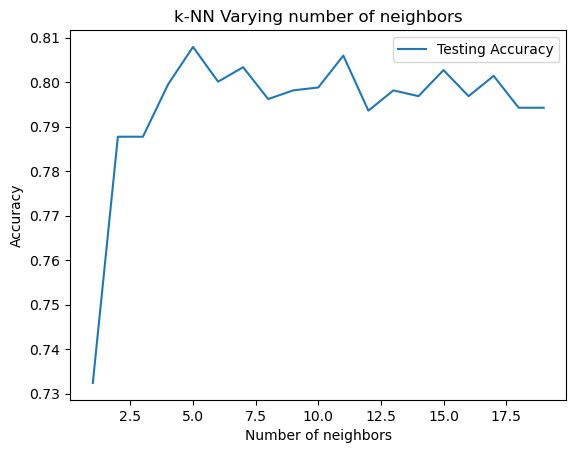

In [18]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
#plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [19]:
## determine the best k for kNN

max_test_score = max(test_accuracy)
test_scores_ind = [i for i, v in enumerate(test_accuracy) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100, 
                                              list(map(lambda x: x+1, test_scores_ind))))


print('---')

print(max_test_score*100)

print(list(map(lambda x: x+1, test_scores_ind)))

Max test score 80.79427083333334 % and k = [5]
---
80.79427083333334
[5]


In [20]:
#check maxAccuracy
max(test_accuracy)

0.8079427083333334

# Apply kNN with optimised k of 5

In [21]:
# instantiate the model with k=5 as an optimum
knn_5 = KNeighborsClassifier(n_neighbors=5)

# fit the model to the training set
knn_5.fit(X_train, y_train)

# predict on the test-set
y_pred_5 = knn_5.predict(X_test)

#consideration of actual label y_test and predicted label y_pred_5
#print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, 
#                                                                        y_pred_5)))

print('Training set score: {:.4f}'.format(knn_5.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn_5.score(X_test, y_test)))

Training set score: 0.8364
Test set score: 0.8079


In [22]:
# Print the Confusion Matrix with k =12 and slice it into four pieces
from sklearn.metrics import confusion_matrix

# Generate Confsion Matrix
cm_5 = confusion_matrix(y_test, y_pred_5)

<AxesSubplot:>

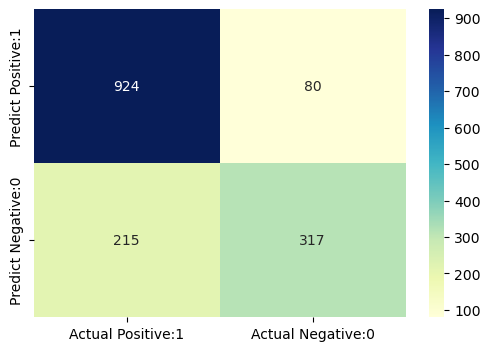

In [23]:
# visualize cm via seaborn heatmap

plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_5, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [24]:
# Additional Classification metrics

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1004
           1       0.80      0.60      0.68       532

    accuracy                           0.81      1536
   macro avg       0.80      0.76      0.77      1536
weighted avg       0.81      0.81      0.80      1536



# Application of Cross-Validation to additionally optimise the model

In [25]:
# Application of 10-Fold Cross Validation for k = 5
# no sign of overfitting according to the cv-results here

from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_5, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.7275641  0.74679487 0.7724359  0.78846154 0.75       0.76602564
 0.76923077 0.75884244 0.75562701 0.76205788]


In [26]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7597
